# Plotting brain region values on circular flatmap

This example walks through various ways to overlay brain region values on a circular flatmap

## The circular flatmap

The circular flatmap is obtained by sampling the volume using concentric circles through the brain.

In [1]:
from iblatlas.flatmaps import FlatMap
flmap_cr = FlatMap(flatmap='circles')

/opt/hostedtoolcache/Python/3.12.9/x64/lib/python3.12/site-packages/iblatlas/atlas.py:172: RuntimeWarning: invalid value encountered in cast
  ii = np.array(np.round(i)).astype(int)


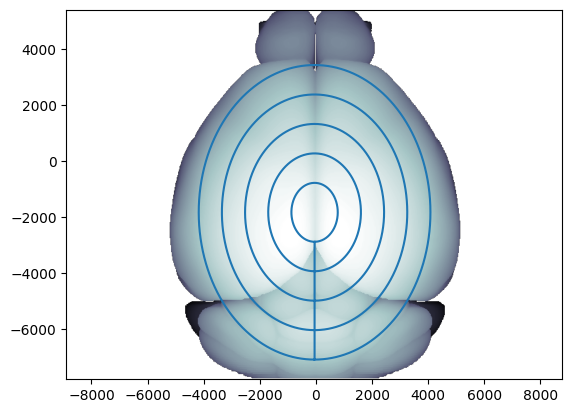

In [2]:
# Display the concentric circles used in flatmap
ax = flmap_cr.plot_top(volume='image')
ax.plot(flmap_cr.ml_scale * 1e6, flmap_cr.ap_scale * 1e6)

This results in a flatmap that can be displayed in the following way

<Axes: >

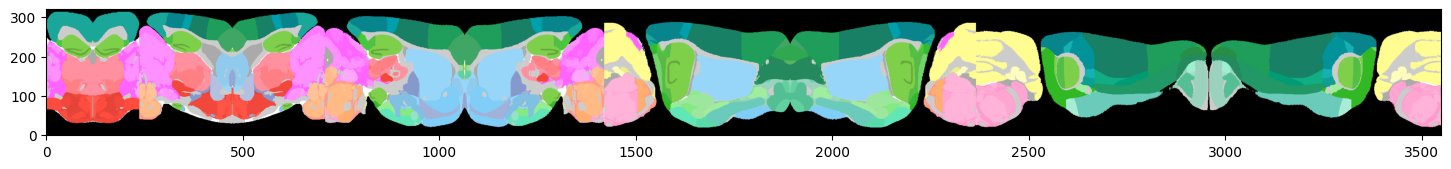

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,4))
flmap_cr.plot_flatmap(ax)

It is also possible to display this flatmap such that each circle is stacked on top of eachother. For this, the **pyramid** flatmap should be used

In [4]:
# Instantiate flatmap with circles arranged vetically on top of eachother
flmap_py = FlatMap(flatmap='pyramid')

<Axes: >

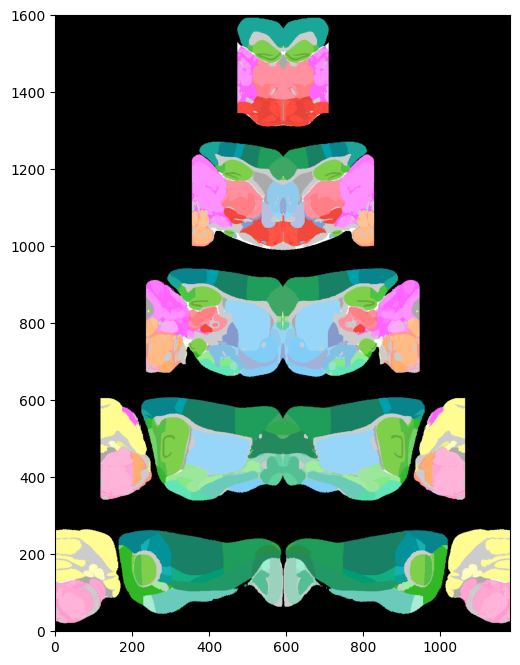

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
flmap_py.plot_flatmap(ax=ax)

## Data preparation

In order to plot brain regions values on the flatmap an array of acronyms and an array of values corresponding to each acronym must be provided. A detailed overview of how to prepare your data can be found [here](https://int-brain-lab.github.io/iblenv/notebooks_external/atlas_plotting_scalar_on_slice.html#Data-preparation)

In [6]:
import numpy as np
# prepare array of acronyms
acronyms = np.array(['VPM', 'PO', 'LP', 'CA1', 'DG-mo', 'VISa5', 'SSs5'])
# assign data to each acronym
values = np.arange(acronyms.size)

In [7]:
from iblatlas.regions import BrainRegions
br = BrainRegions()
# prepare array of acronyms with beryl mapping
acronyms_beryl = np.unique(br.acronym2acronym(acronyms, mapping='Beryl'))
values_beryl = np.arange(acronyms_beryl.size)

In [8]:
# prepare different values for left and right hemipshere for Beryl acronyms
values_beryl_lh = np.random.randint(0, 10, acronyms_beryl.size)
values_beryl_rh = np.random.randint(0, 10, acronyms_beryl.size)
values_beryl_lr = np.c_[values_beryl_lh, values_beryl_rh]

## Examples

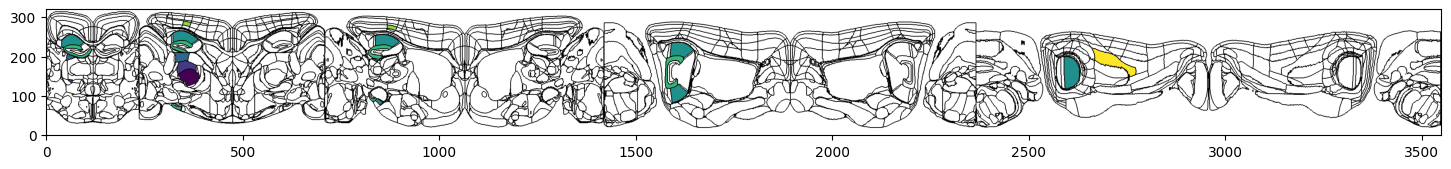

In [9]:
from iblatlas.plots import plot_scalar_on_flatmap
# Plot region values on the left hemisphere of circle flatmap overlaid on brain region boundaries using Allen mapping
fig, ax = plt.subplots(figsize=(18,4))
fig, ax = plot_scalar_on_flatmap(acronyms, values, hemisphere='left', mapping='Allen', flmap_atlas=flmap_cr, ax=ax)

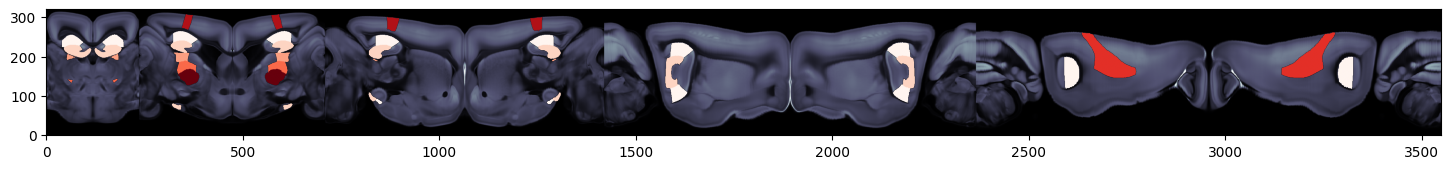

In [10]:
# Plot region values on the both hemispheres of circle flatmap overlaid on the dwi Allen image  using Beryl mapping
fig, ax = plt.subplots(figsize=(18,4))
fig, ax = plot_scalar_on_flatmap(acronyms_beryl, values_beryl, hemisphere='both', mapping='Beryl', background='image', 
                                 cmap='Reds', flmap_atlas=flmap_cr,  ax=ax)

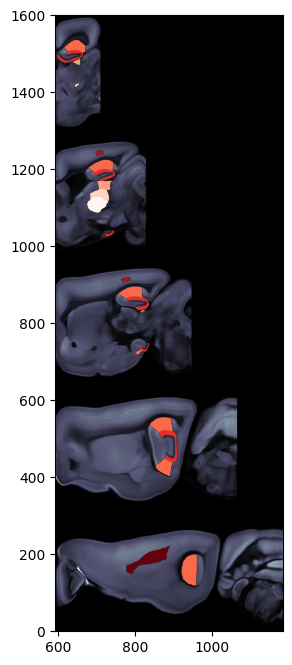

In [11]:
# Plot region values on the right hemisphere of pyramidal flatmap overlaid on the dwi Allen image using Allen mapping
fig, ax = plt.subplots(figsize=(8,8))
fig, ax = plot_scalar_on_flatmap(acronyms, values, hemisphere='right', mapping='Allen', background='image', 
                                 cmap='Reds', flmap_atlas=flmap_py,  ax=ax)

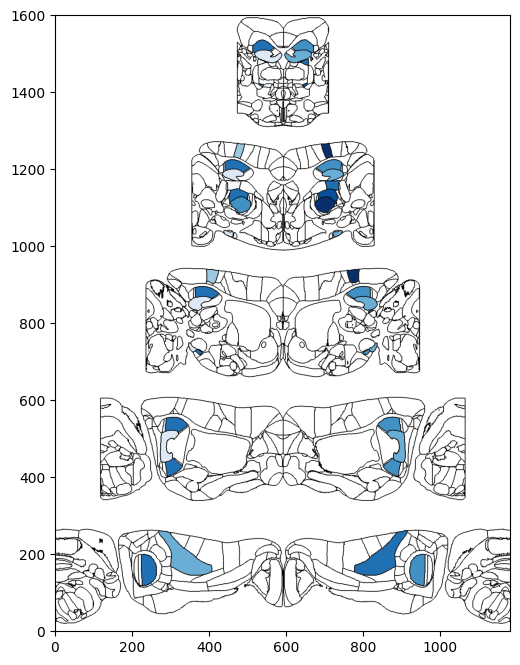

In [12]:
# Plot two column region values on the both hemispheres of pyramidal flatmap overlaid on brain region boundaries 
# using Beryl mapping
fig, ax = plt.subplots(figsize=(8,8))
fig, ax = plot_scalar_on_flatmap(acronyms_beryl, values_beryl_lr, hemisphere='both', mapping='Beryl', 
                                 background='boundary', cmap='Blues', flmap_atlas=flmap_py,  ax=ax)